In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from scipy import stats
!pip install yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
df = pd.read_csv('credit card data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [348]:
df.shape

(8950, 18)

In [349]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [350]:
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [351]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
df.MINIMUM_PAYMENTS = imputer.fit_transform(df['MINIMUM_PAYMENTS'].values.reshape(-1,1))[:,0]
df.isnull().sum().sort_values(ascending=False)

CREDIT_LIMIT                        1
CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

In [352]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

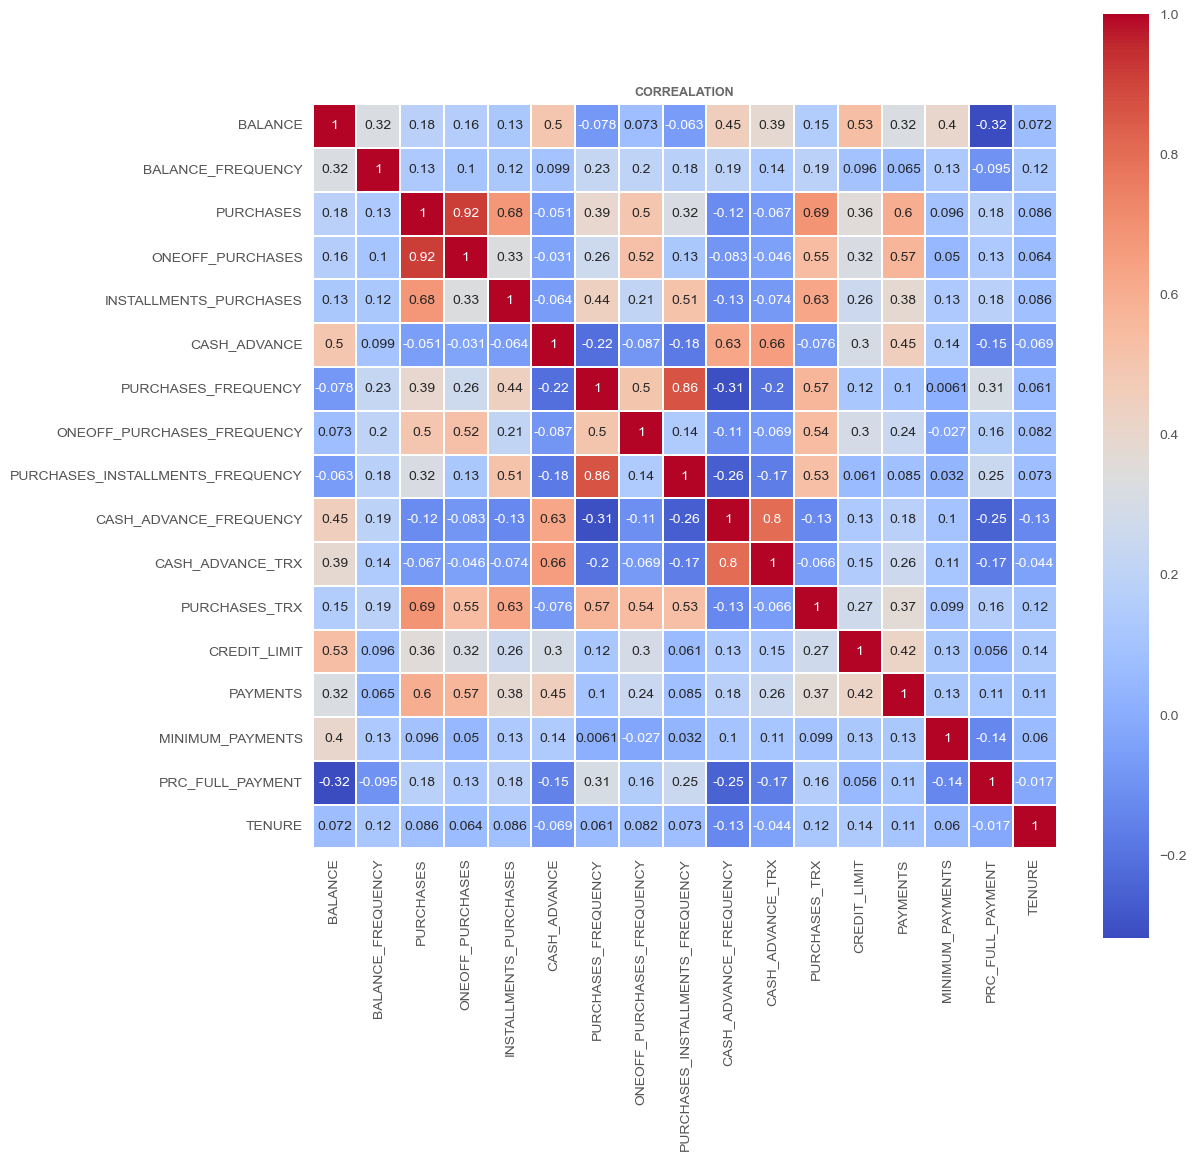

In [353]:
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('CORREALATION', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.show();

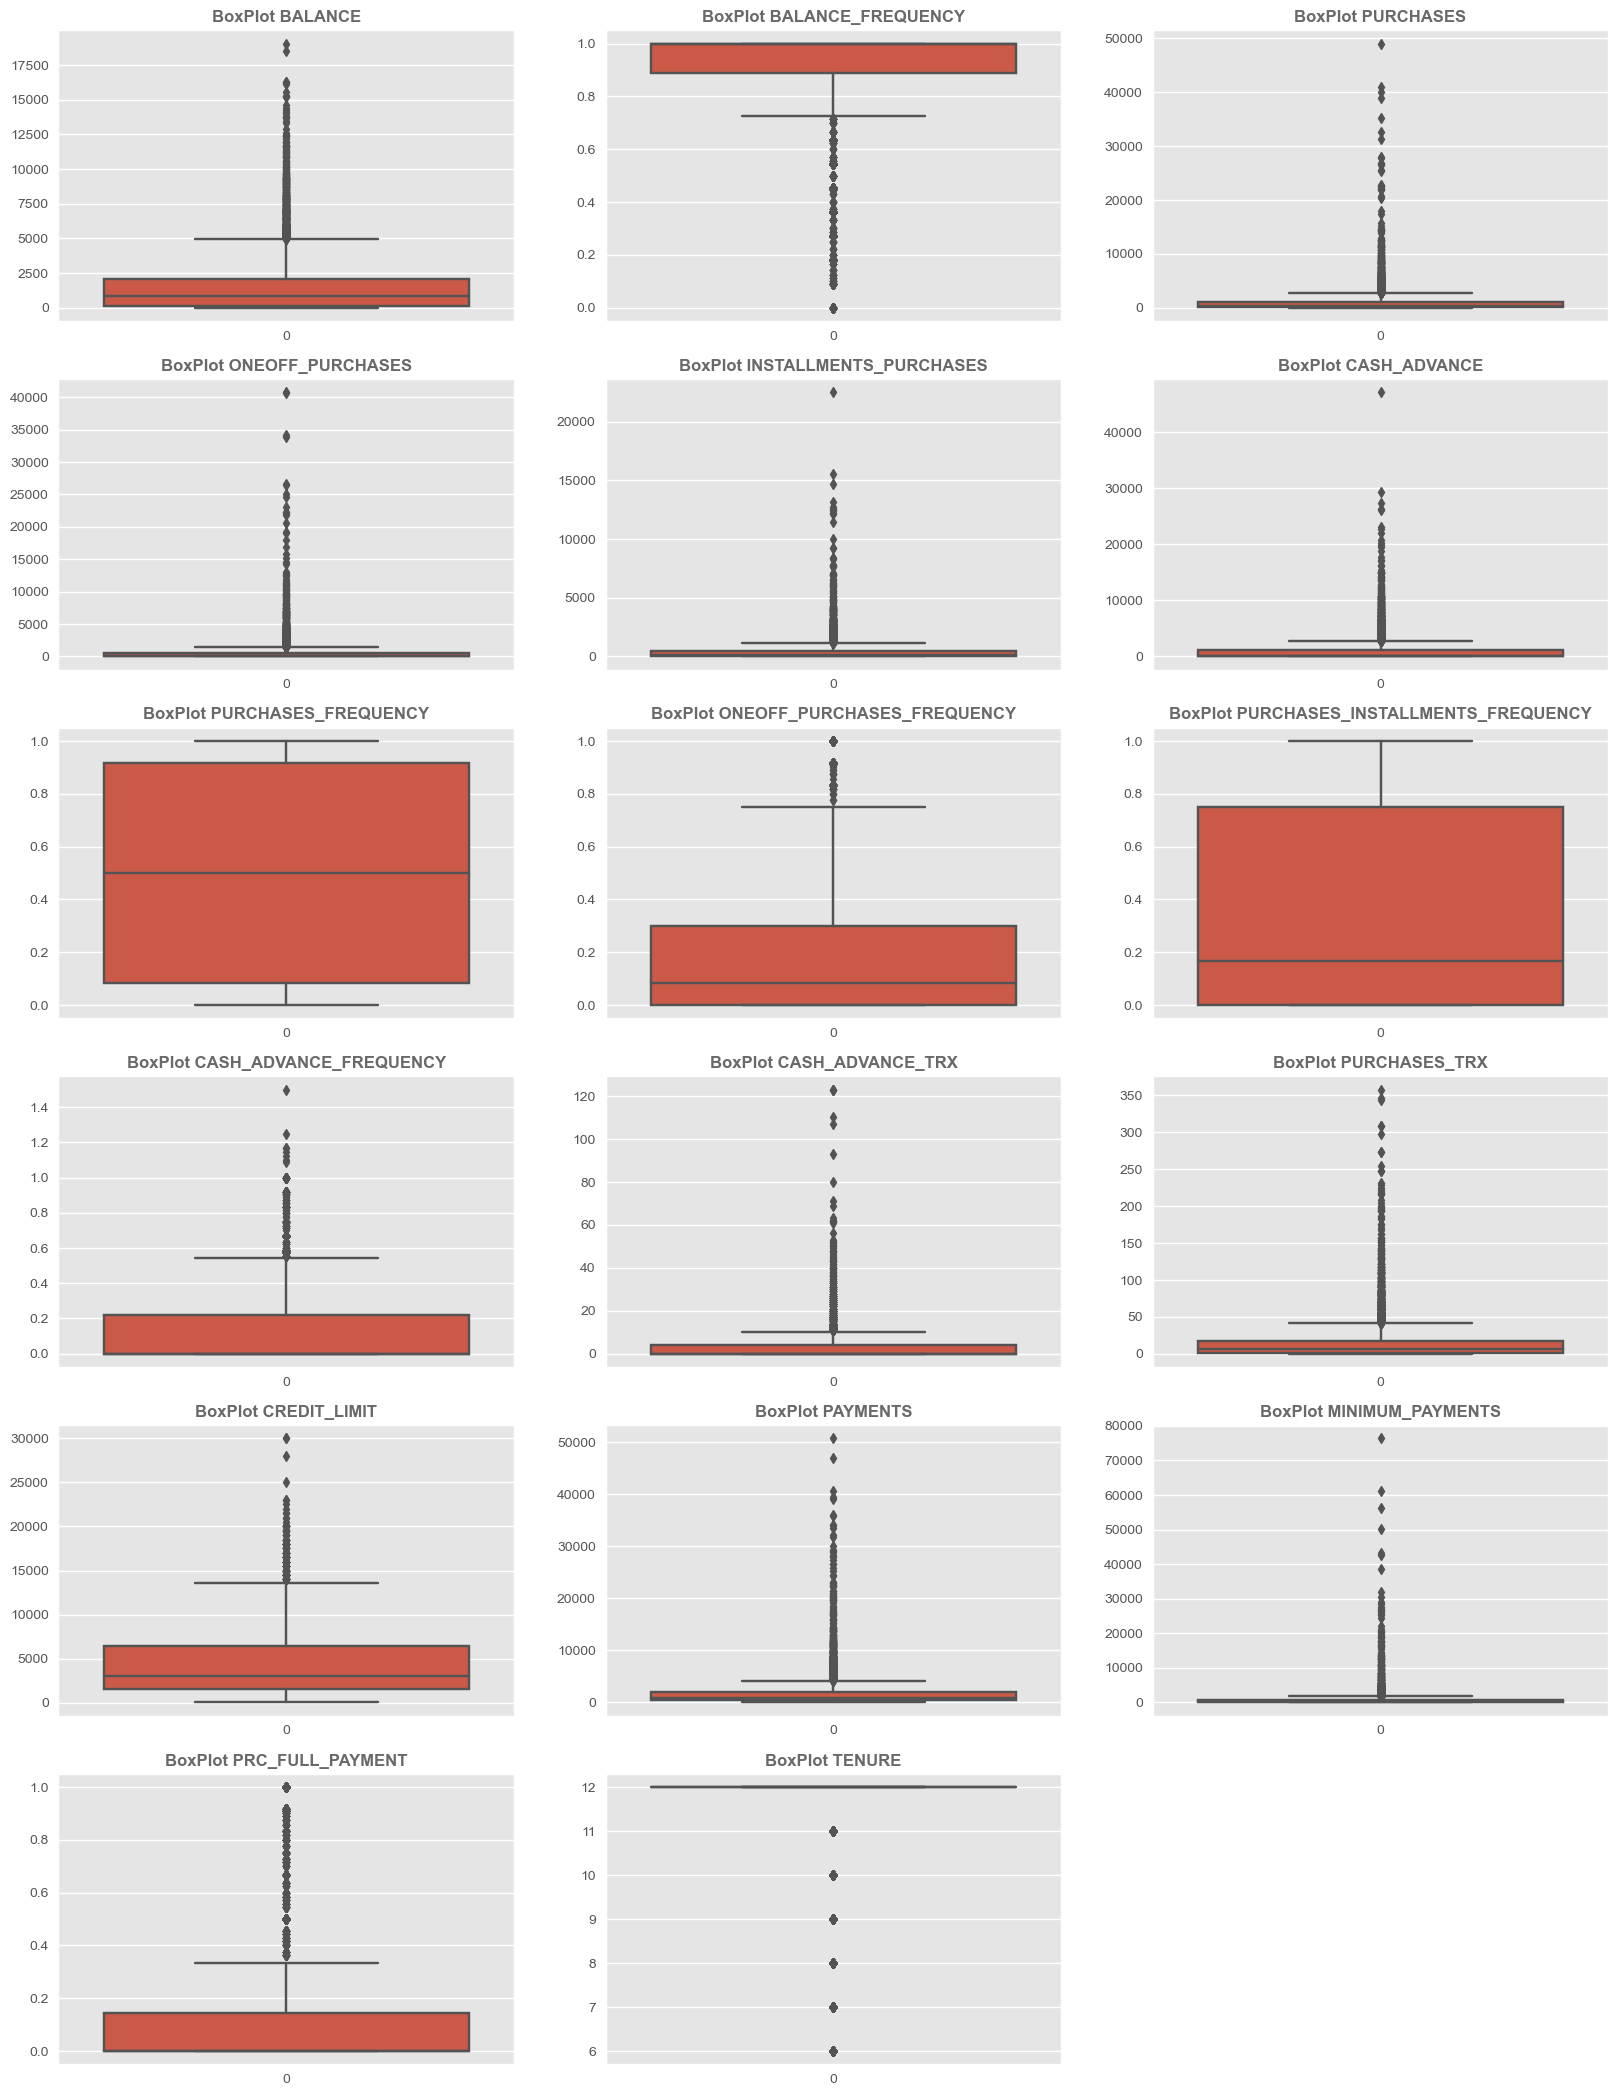

In [354]:
v_n = list(df.select_dtypes(include=['float64', 'int64']).columns)
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

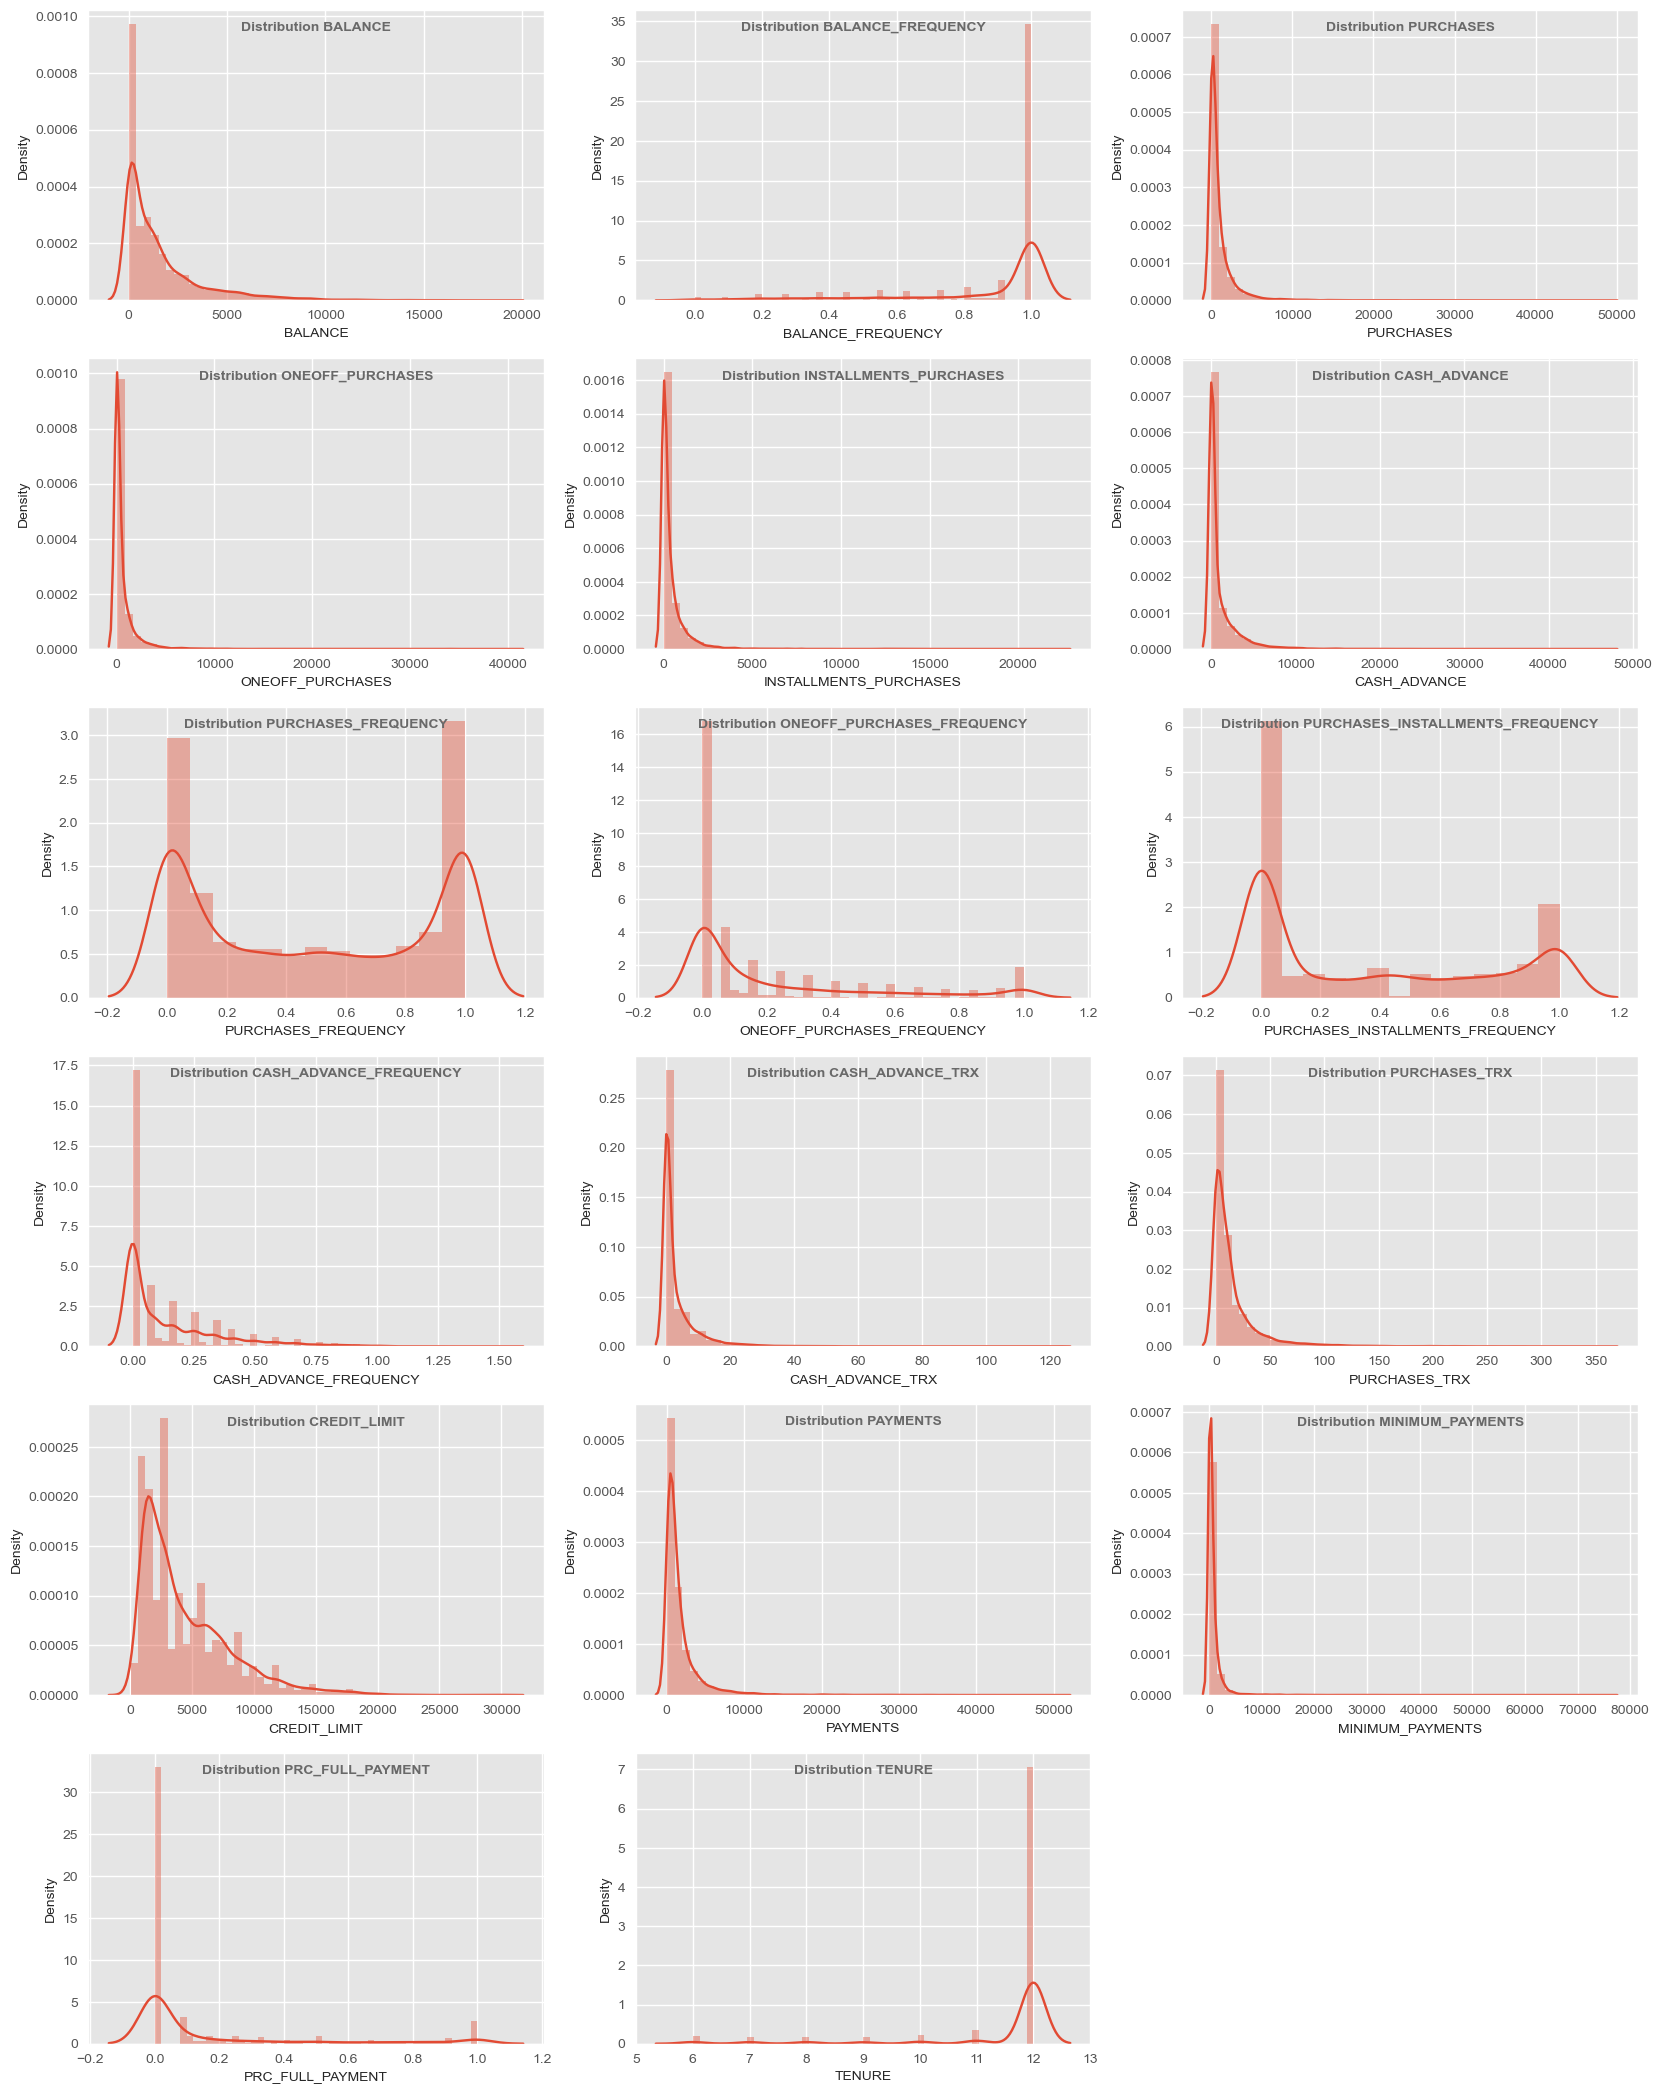

In [355]:
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

In [356]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [357]:
fit_data=pd.DataFrame()
lambda_val={}
for column in df.columns:
    fit_data[column],lambda_val[column]=stats.yeojohnson(df[column])
fit_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5.524747,65.922468,6.874951,-0.000000,4.657376,-0.000000,0.157732,-0.000000,0.075977,-0.000000,-0.000000,1.090831,8.385324,9.474290,4.370506,-0.000000,6.463097e+20
1,19.869449,112.939636,0.000000,-0.000000,0.000000,6.188638,0.000000,-0.000000,-0.000000,0.126815,0.980629,-0.000000,11.372342,21.427566,5.870980,0.109774,6.463097e+20
2,18.670769,188.661479,12.254973,5.493892,0.000000,-0.000000,0.769615,0.219949,-0.000000,-0.000000,-0.000000,2.522799,11.484190,13.120515,5.490751,-0.000000,6.463097e+20
3,16.853637,20.575320,14.396739,5.930609,0.000000,4.289832,0.081001,0.067673,-0.000000,0.064387,0.553325,0.690044,11.484190,0.000000,4.981035,-0.000000,6.463097e+20
4,13.980771,188.661479,3.629633,2.607422,0.000000,-0.000000,0.081001,0.067673,-0.000000,-0.000000,-0.000000,0.690044,8.651846,13.436859,4.798824,-0.000000,6.463097e+20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,4.815384,188.661479,9.503068,-0.000000,5.814831,-0.000000,0.769615,-0.000000,0.417868,-0.000000,-0.000000,1.921586,8.385324,10.922742,3.544339,0.138279,2.983604e+15
8945,4.102381,188.661479,9.581076,-0.000000,5.846245,-0.000000,0.769615,-0.000000,0.417868,-0.000000,-0.000000,1.921586,8.385324,10.404827,4.981035,-0.000000,2.983604e+15
8946,4.452240,72.245659,7.792534,-0.000000,5.085190,-0.000000,0.664093,-0.000000,0.372084,-0.000000,-0.000000,1.771122,8.385324,7.082963,3.959974,0.115136,2.983604e+15
8947,3.517914,72.245659,0.000000,-0.000000,0.000000,3.121768,0.000000,-0.000000,-0.000000,0.102905,0.775208,-0.000000,7.396333,6.087937,3.649661,0.115136,2.983604e+15


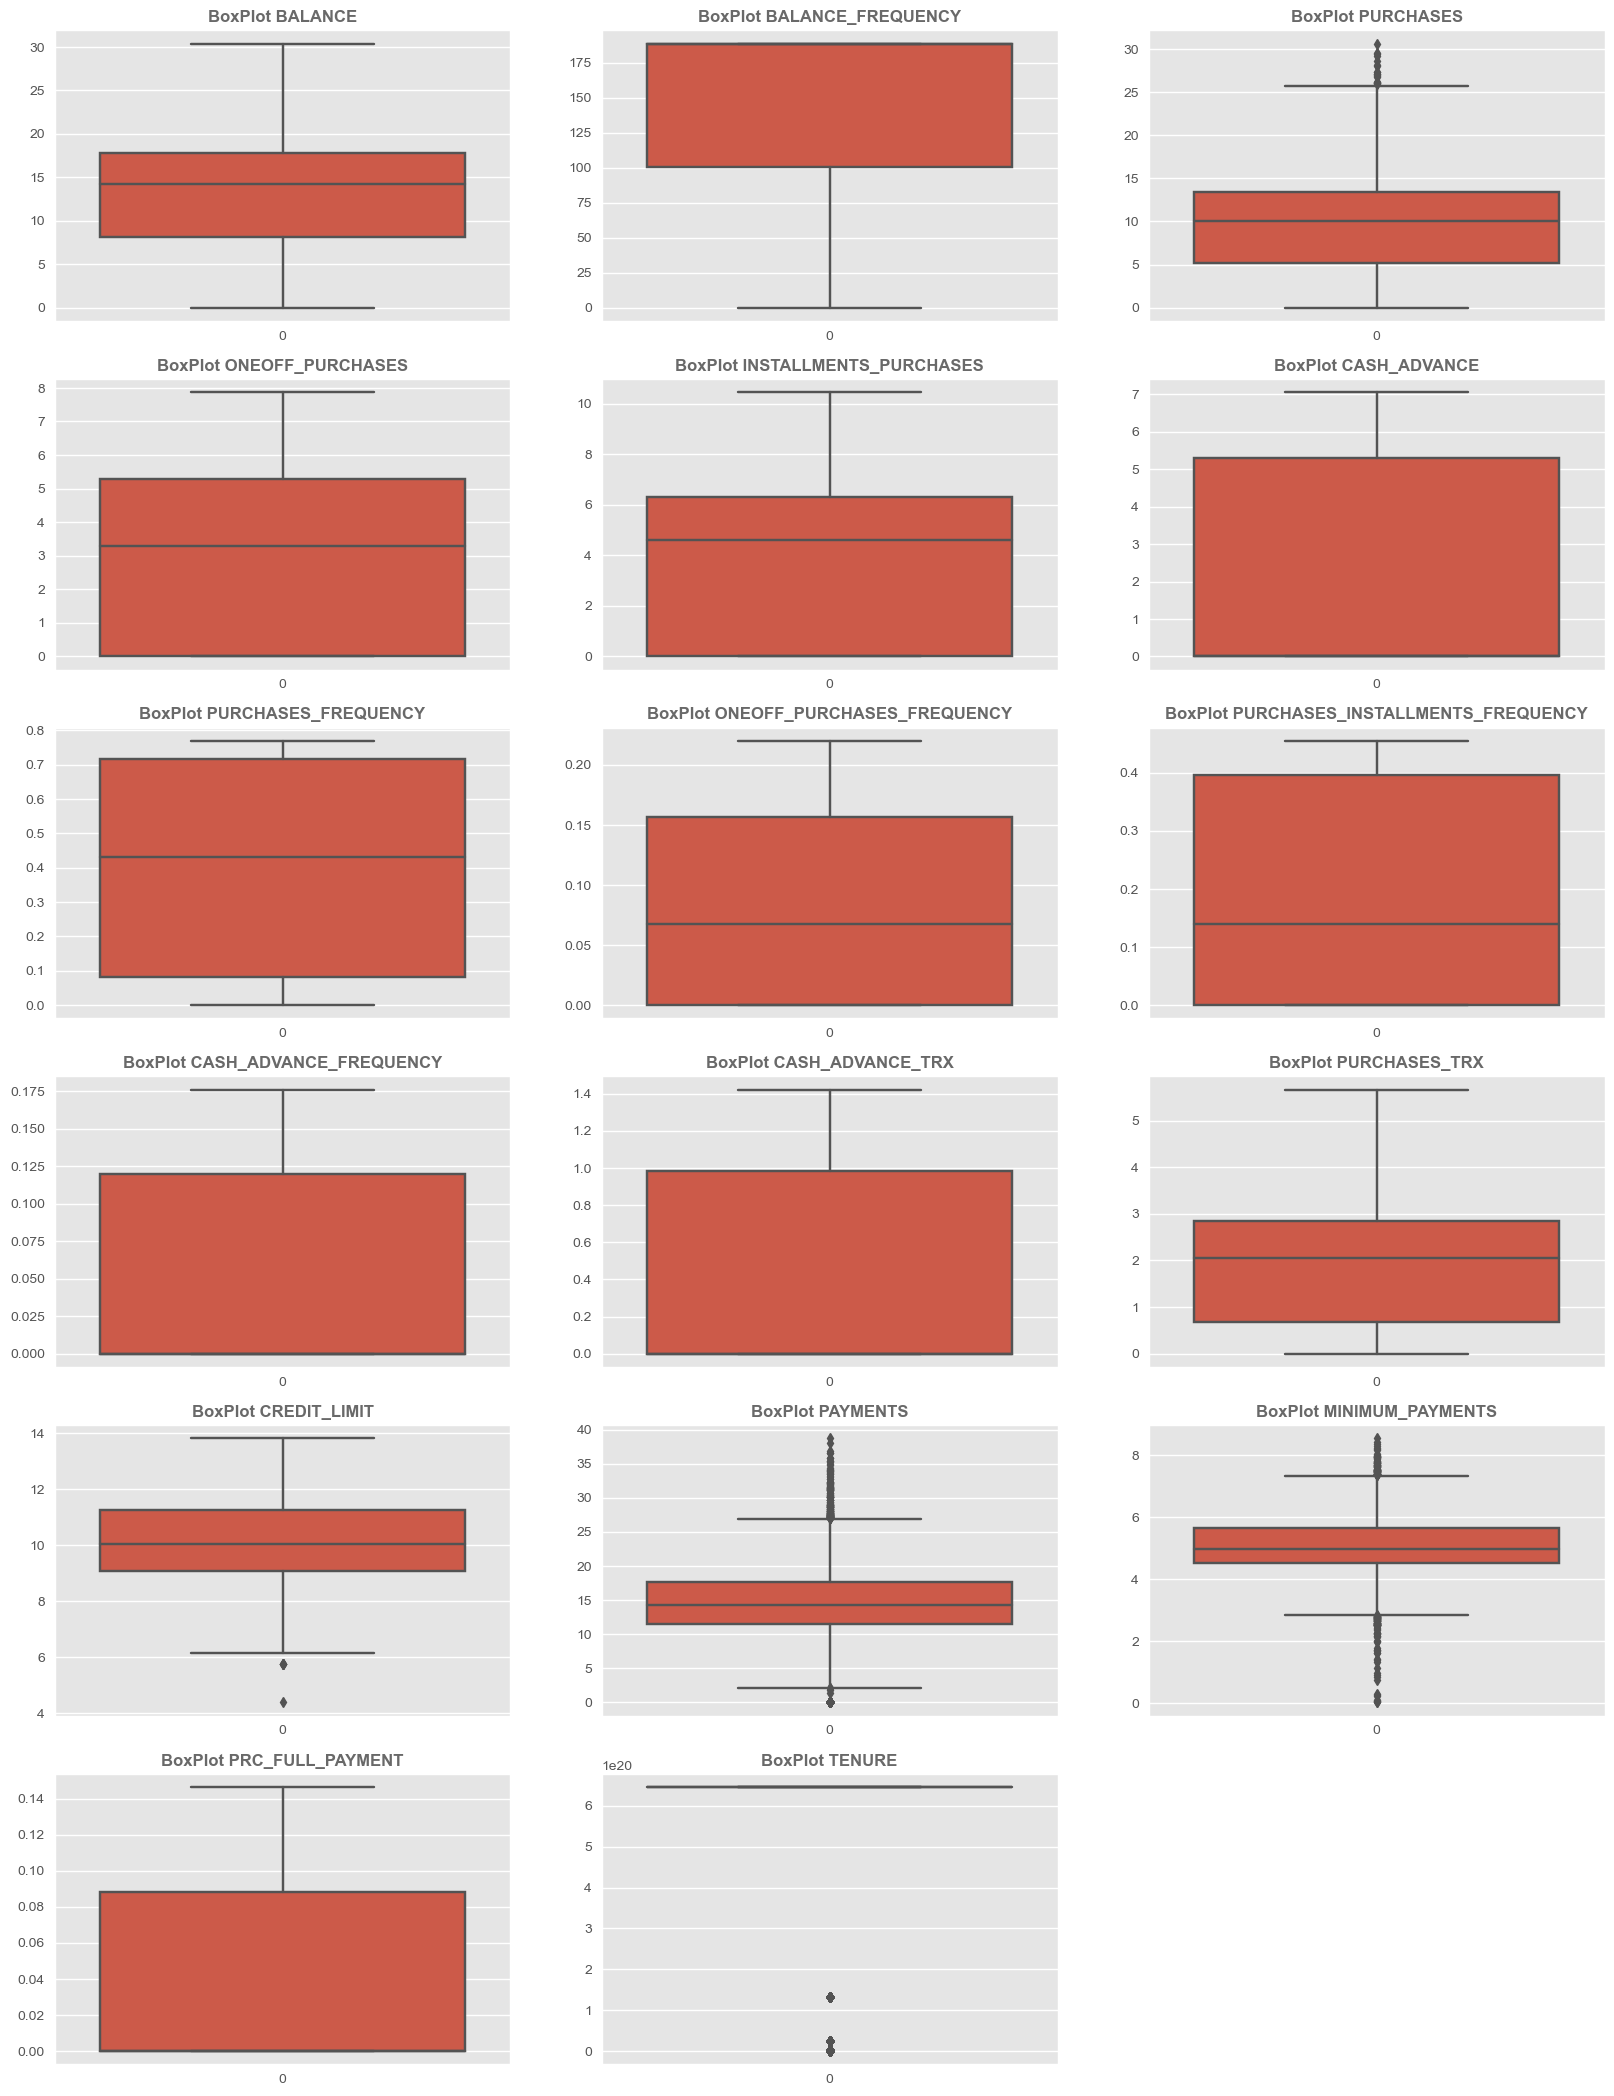

In [358]:
v_n = list(fit_data.select_dtypes(include=['float64', 'int64']).columns)
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(fit_data[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

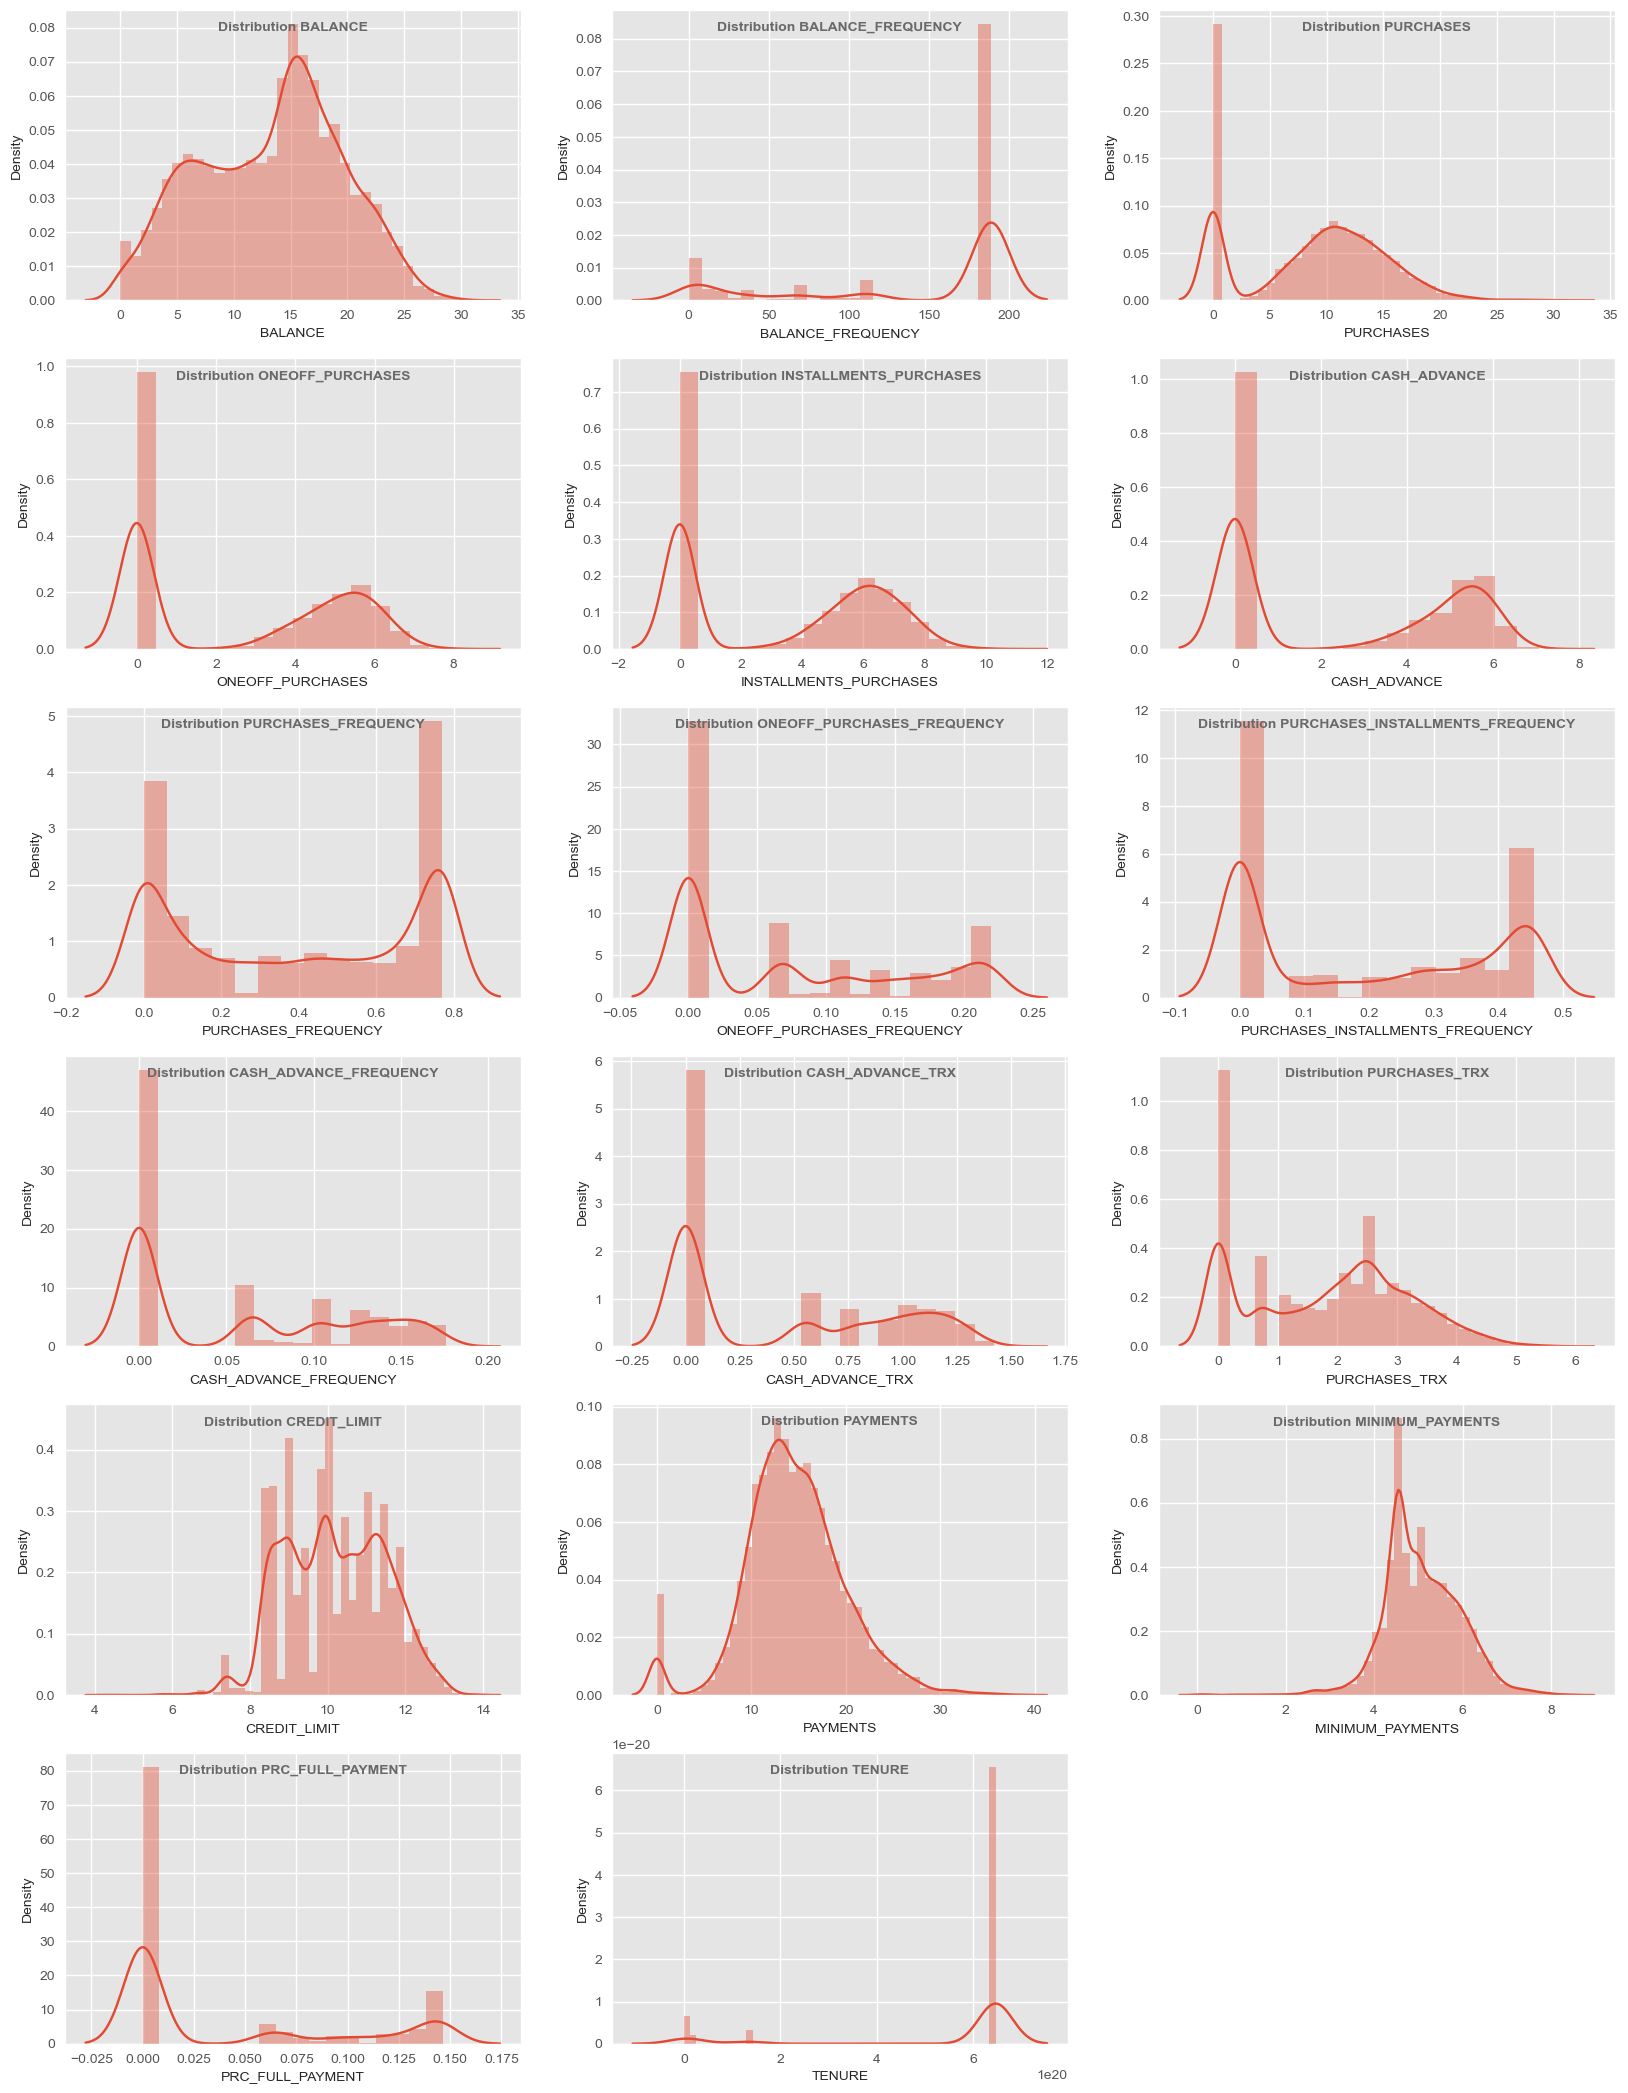

In [359]:
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(fit_data[column])
    plt.title('Distribution {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

In [360]:
cols_drop=["MINIMUM_PAYMENTS","TENURE"]
df=fit_data.drop(columns=cols_drop)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
0,5.524747,65.922468,6.874951,-0.000000,4.657376,-0.000000,0.157732,-0.000000,0.075977,-0.000000,-0.000000,1.090831,8.385324,9.474290,-0.000000
1,19.869449,112.939636,0.000000,-0.000000,0.000000,6.188638,0.000000,-0.000000,-0.000000,0.126815,0.980629,-0.000000,11.372342,21.427566,0.109774
2,18.670769,188.661479,12.254973,5.493892,0.000000,-0.000000,0.769615,0.219949,-0.000000,-0.000000,-0.000000,2.522799,11.484190,13.120515,-0.000000
3,16.853637,20.575320,14.396739,5.930609,0.000000,4.289832,0.081001,0.067673,-0.000000,0.064387,0.553325,0.690044,11.484190,0.000000,-0.000000
4,13.980771,188.661479,3.629633,2.607422,0.000000,-0.000000,0.081001,0.067673,-0.000000,-0.000000,-0.000000,0.690044,8.651846,13.436859,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,4.815384,188.661479,9.503068,-0.000000,5.814831,-0.000000,0.769615,-0.000000,0.417868,-0.000000,-0.000000,1.921586,8.385324,10.922742,0.138279
8945,4.102381,188.661479,9.581076,-0.000000,5.846245,-0.000000,0.769615,-0.000000,0.417868,-0.000000,-0.000000,1.921586,8.385324,10.404827,-0.000000
8946,4.452240,72.245659,7.792534,-0.000000,5.085190,-0.000000,0.664093,-0.000000,0.372084,-0.000000,-0.000000,1.771122,8.385324,7.082963,0.115136
8947,3.517914,72.245659,0.000000,-0.000000,0.000000,3.121768,0.000000,-0.000000,-0.000000,0.102905,0.775208,-0.000000,7.396333,6.087937,0.115136


In [336]:
list(df.columns)

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'PRC_FULL_PAYMENT']

In [361]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df_norm=pd.DataFrame(scaler.fit_transform(df[['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'PRC_FULL_PAYMENT']]),columns=['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'PRC_FULL_PAYMENT'])
df_norm

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
0,-1.238338,-1.080160,-0.368311,-1.000587,0.383490,-0.944443,-0.767073,-0.903388,-0.606798,-0.883112,-0.905730,-0.573879,-1.425281,-0.984331,-0.677937
1,1.051883,-0.425620,-1.505361,-1.000587,-1.085536,1.399858,-1.278999,-0.903388,-1.004536,1.124507,1.044306,-1.387809,0.924151,1.285324,1.234846
2,0.860506,0.628527,0.521492,1.065269,-1.085536,-0.944443,1.218811,1.732520,-1.004536,-0.883112,-0.905730,0.494594,1.012124,-0.291996,-0.677937
3,0.570390,-1.711452,0.875720,1.229487,-1.085536,0.680576,-1.016108,-0.092379,-1.004536,0.136204,0.194588,-0.872928,1.012124,-2.783284,-0.677937
4,0.111719,0.628527,-0.905055,-0.020124,-1.085536,-0.944443,-1.016108,-0.092379,-1.004536,-0.883112,-0.905730,-0.872928,-1.215649,-0.231929,-0.677937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-1.351592,0.628527,0.066354,-1.000587,0.748574,-0.944443,1.218811,-0.903388,1.182998,-0.883112,-0.905730,0.045994,-1.425281,-0.709303,1.731536
8945,-1.465427,0.628527,0.079256,-1.000587,0.758482,-0.944443,1.218811,-0.903388,1.182998,-0.883112,-0.905730,0.045994,-1.425281,-0.807644,-0.677937
8946,-1.409570,-0.992133,-0.216552,-1.000587,0.518431,-0.944443,0.876335,-0.903388,0.943317,-0.883112,-0.905730,-0.066275,-1.425281,-1.438390,1.328285
8947,-1.558741,-0.992133,-1.505361,-1.000587,-1.085536,0.238105,-1.278999,-0.903388,-1.004536,0.745986,0.635813,-1.387809,-2.203169,-1.627323,1.328285


In [362]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
dtype: int64

In [363]:
pca = PCA()
# Apply the PCA
df_pca = pca.fit_transform(df_norm)

In [364]:
num_com = range(1, 15)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
ev = pca.explained_variance_
df_ev = pd.DataFrame(ev, columns=['Explained Variance'])
df_ev = pd.concat([df_com, df_ev], axis=1)
df_ev.index = df_ev.index + 1
df_ev
df_ev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Explained Variance
1,1.000000,6.004447
2,2.000000,3.346628
3,3.000000,1.675870
4,4.000000,1.206261
5,5.000000,0.909569
6,6.000000,0.721749
7,7.000000,0.484827
8,8.000000,0.175904
9,9.000000,0.152397
10,10.000000,0.119148


In [365]:
num_com = range(1, 15)
df_com = pd.DataFrame(num_com, columns=['Number of Components'])
pev = (pca.explained_variance_ratio_) * 100
df_pev = pd.DataFrame(pev, columns=['Percentage of Explained Variance'])
df_pev = pd.concat([df_com, df_pev], axis=1)
df_pev.index = df_ev.index + 1
df_pev
df_pev.style.set_properties(**{'text-align': 'center'})

,Number of Components,Percentage of Explained Variance
2,1.000000,40.025174
3,2.000000,22.308362
4,3.000000,11.171216
5,4.000000,8.040843
6,5.000000,6.063118
7,6.000000,4.811124
8,7.000000,3.231817
9,8.000000,1.172560
10,9.000000,1.015869
11,10.000000,0.794230


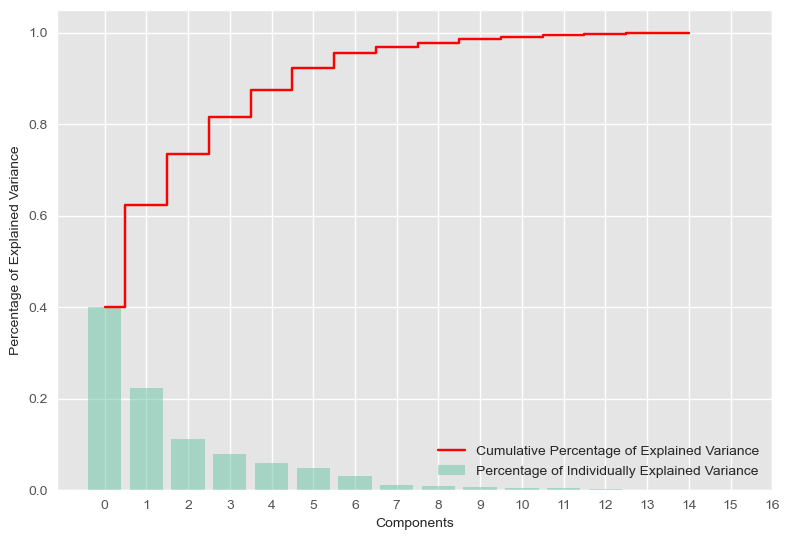

In [342]:
pve = pca.explained_variance_ratio_

# Instantiate the Cumulative Percentage of the Variance
pcve = np.cumsum(pve)

# Plot
plt.bar(range(0,len(pve)), pve, alpha=0.5, align='center', label='Percentage of Individually Explained Variance')
plt.step(range(0,len(pcve)), pcve, where='mid',label='Cumulative Percentage of Explained Variance', color='red')
plt.xticks(range(0, 17))
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

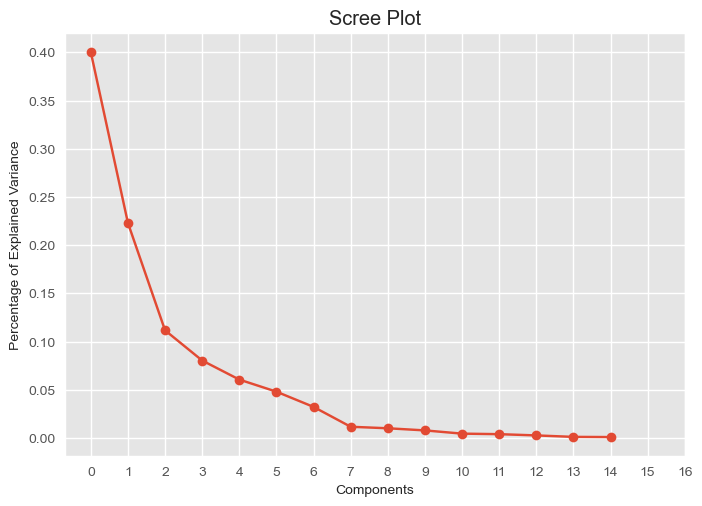

In [366]:
plt.style.use('ggplot')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Components') 
plt.ylabel('Percentage of Explained Variance') 
plt.title('Scree Plot')
plt.show();

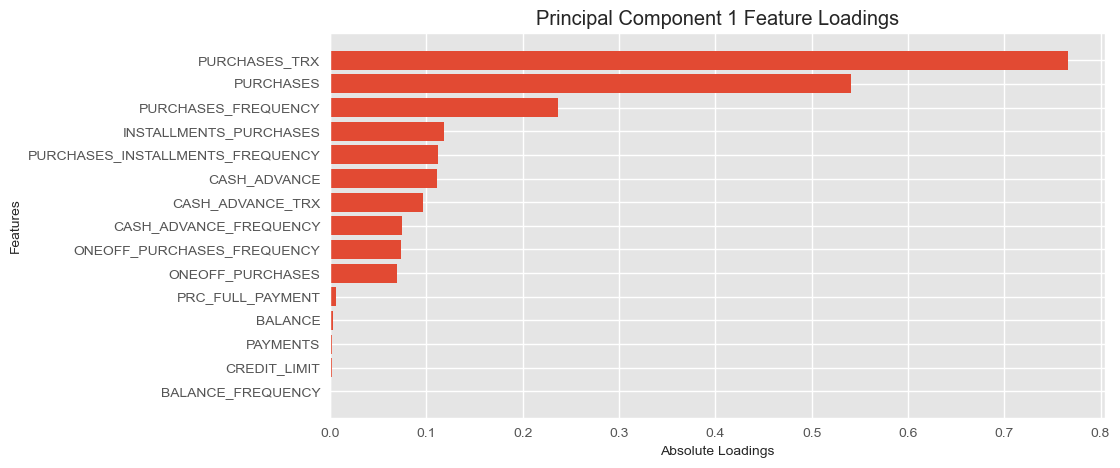

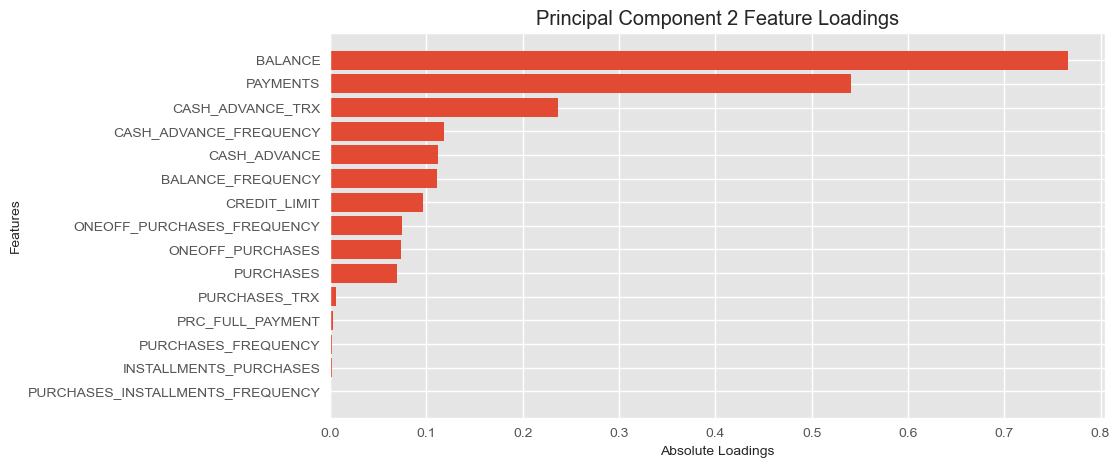

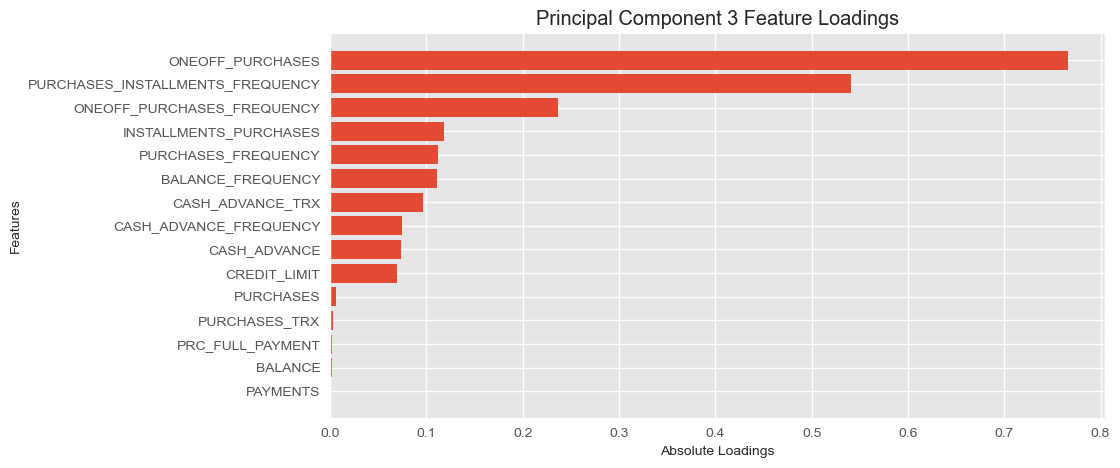

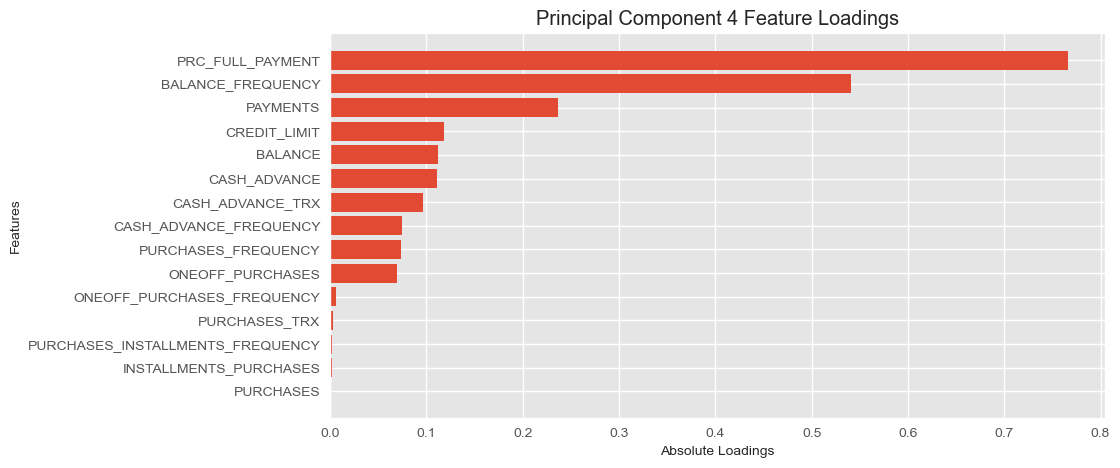

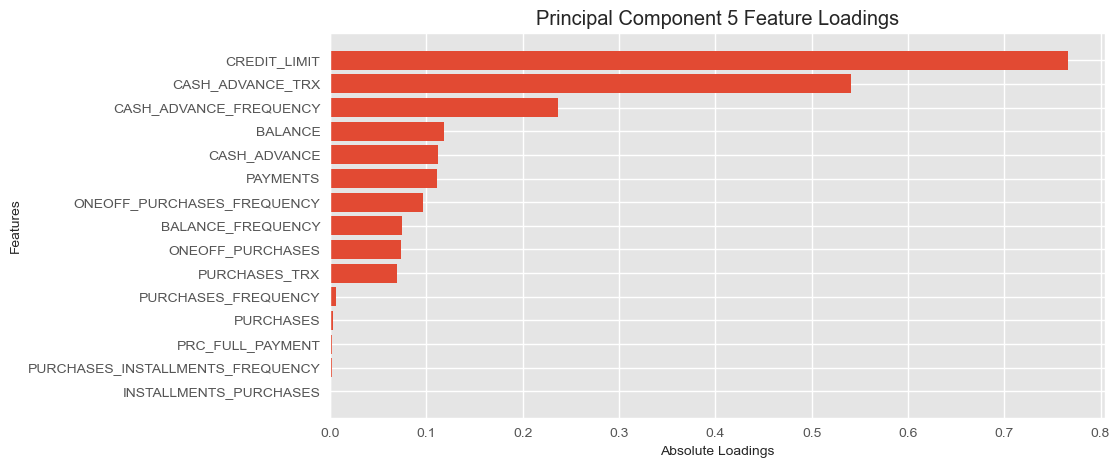

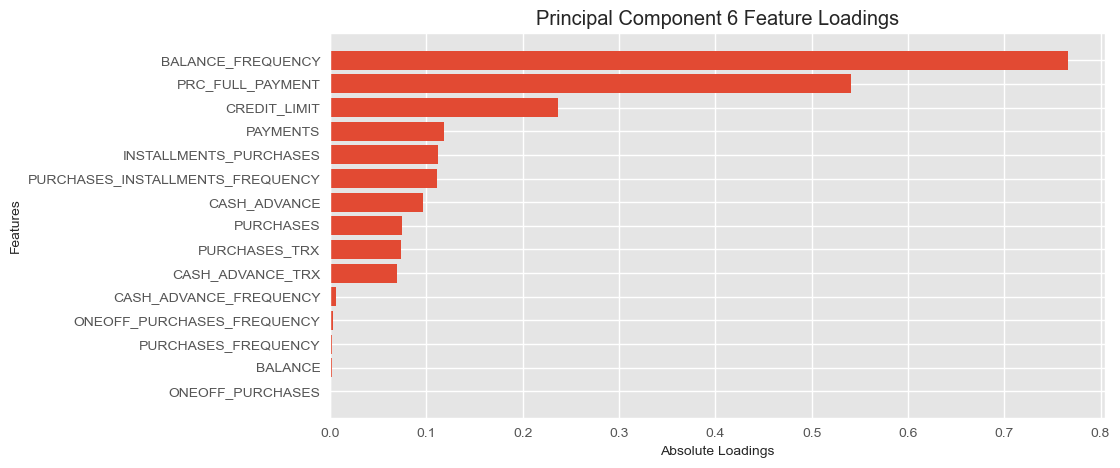

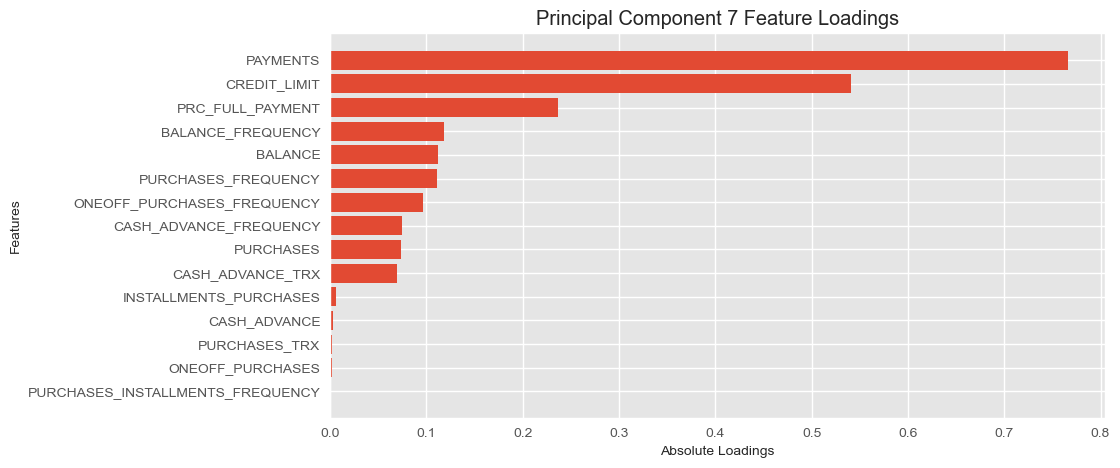

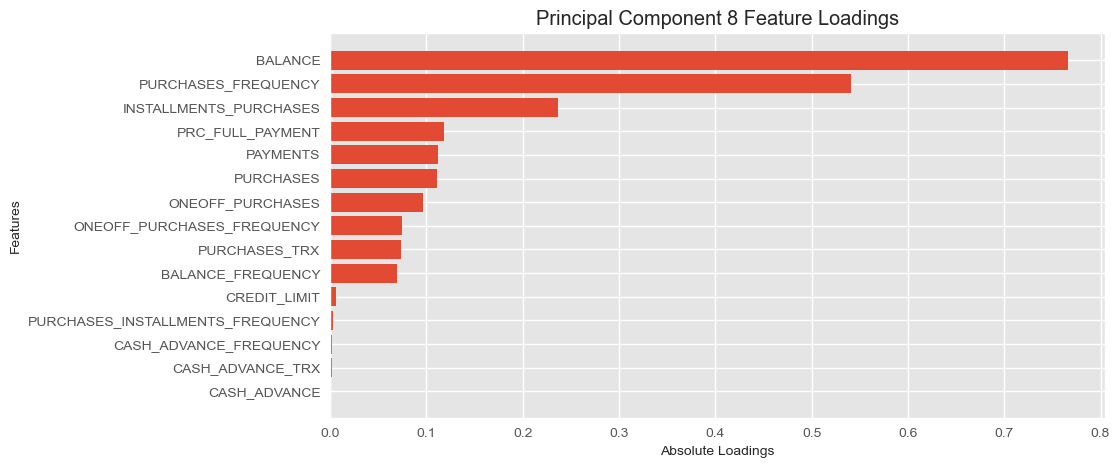

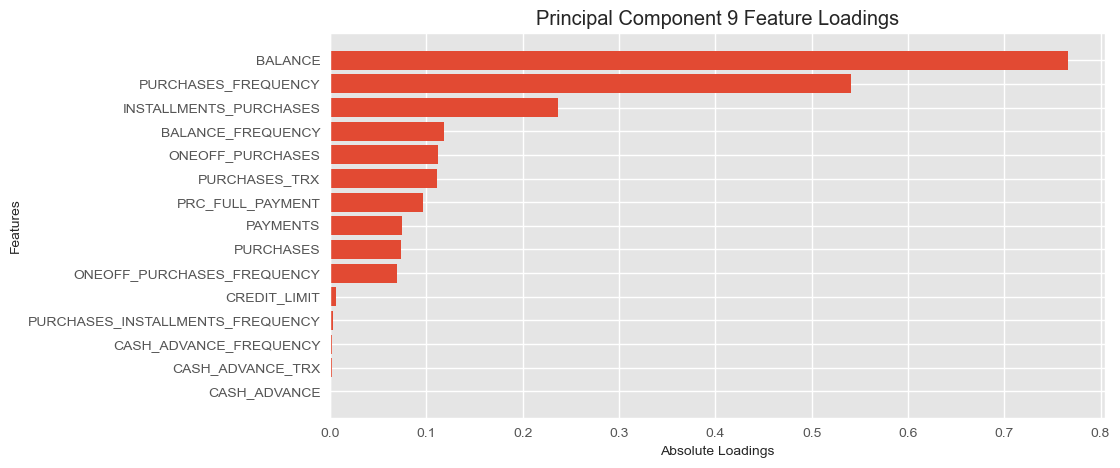

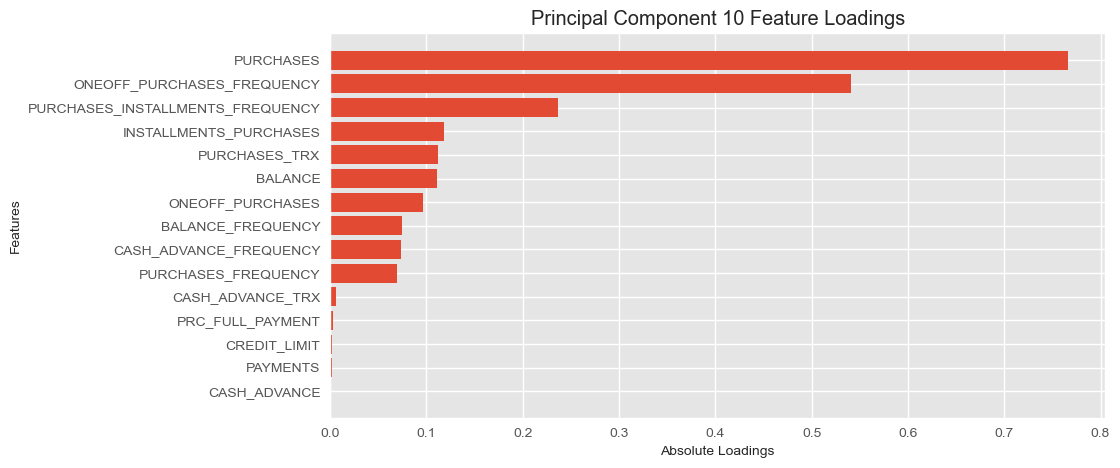

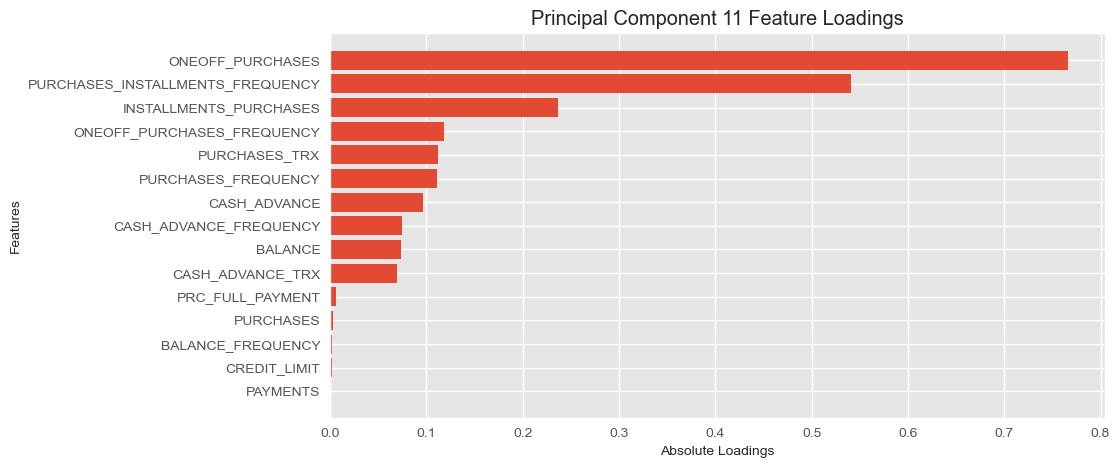

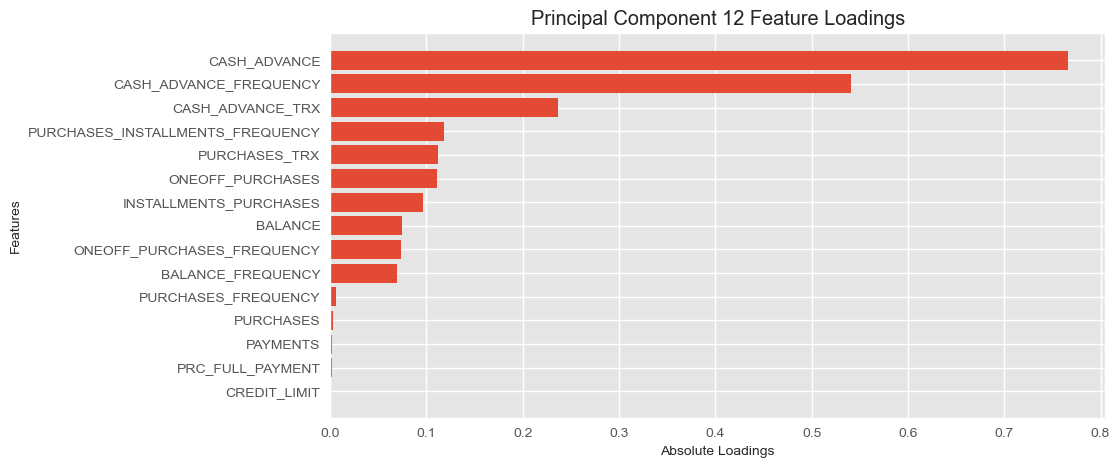

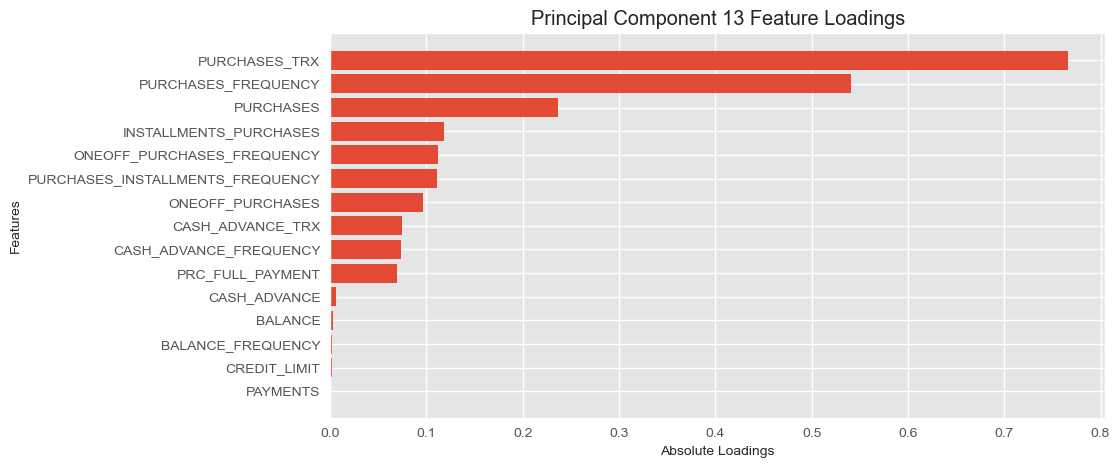

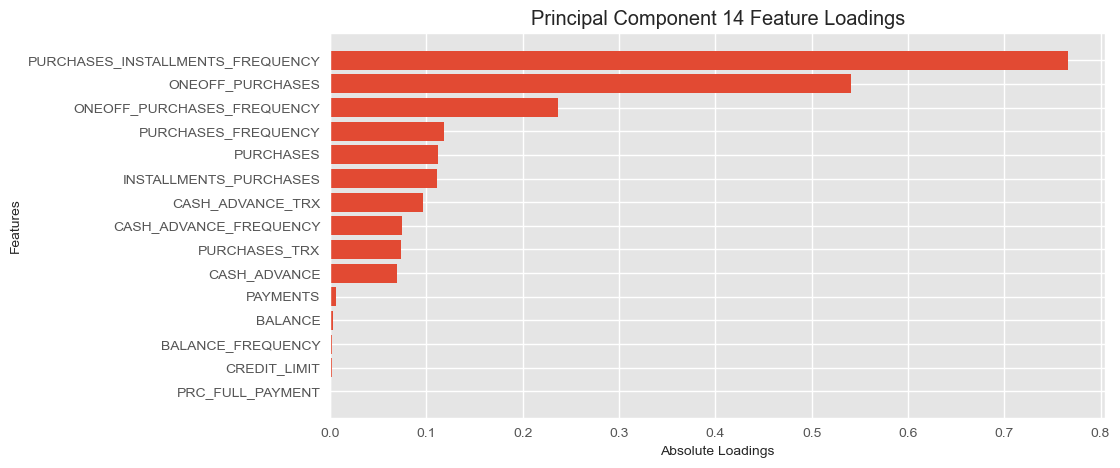

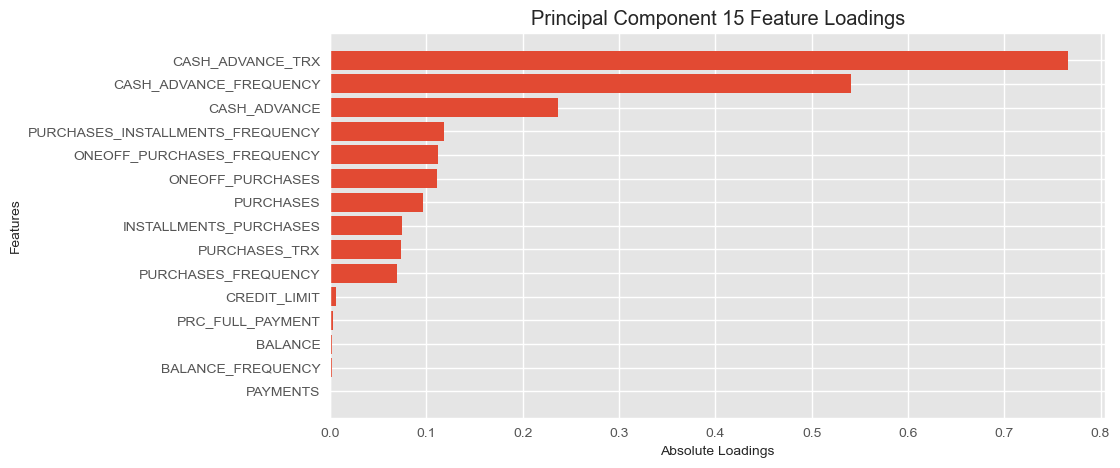

In [369]:
abs_loadings = np.abs(pca.components_)

# Create a list of feature names
feature_names = df.columns.tolist()

# Create a ranking of features based on loadings for each principal component
ranking_per_component = []
for component_loadings in abs_loadings:
    component_ranking = [feature_names[i] for i in np.argsort(component_loadings)[::-1]]
    ranking_per_component.append(component_ranking)

# Plot or display the ranking of features for each principal component
for i, component_ranking in enumerate(ranking_per_component):
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(component_ranking)), component_loadings[np.argsort(component_loadings)[::-1]])
    plt.yticks(range(len(component_ranking)), component_ranking)
    plt.title(f"Principal Component {i+1} Feature Loadings")
    plt.xlabel("Absolute Loadings")
    plt.ylabel("Features")
    plt.gca().invert_yaxis()  # Invert y-axis to display highest loading at the top
    plt.show()

In [371]:
pca1 = PCA(n_components=2, random_state=18)
df_pca1 = pca1.fit_transform(df_norm)
df_pca1


array([[-0.48290922, -3.10060329],
       [-3.42046338,  0.82715043],
       [ 1.40237893,  0.95205234],
       ...,
       [ 1.2108367 , -3.28404638],
       [-2.95314635, -3.01174886],
       [-0.30134265,  0.33532562]])

In [388]:
silhouette_coeff=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(df_pca1)
    score=silhouette_score(df_pca1,kmeans.labels_)
    silhouette_coeff.append(score)
    
silhouette_coeff

[0.4555399677998692,
 0.4512424554883061,
 0.4560076265580495,
 0.41016771270046376,
 0.39716976031864015,
 0.38521748558462376,
 0.38745066280307494,
 0.37258537561240485,
 0.3794929666171056]

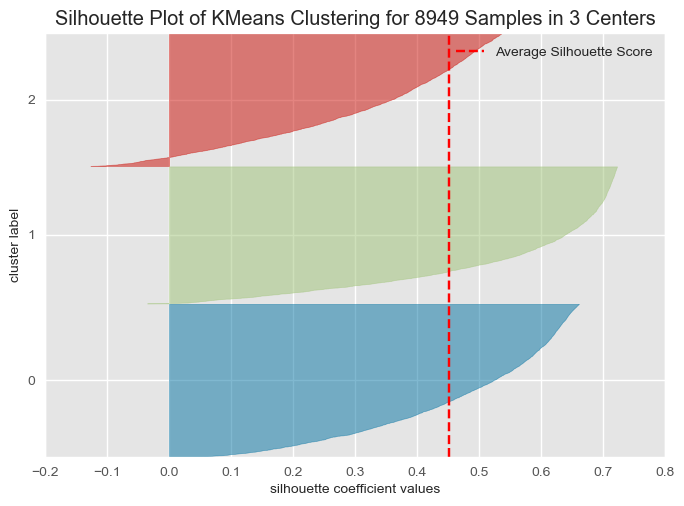

In [374]:
kmeans = KMeans(n_clusters=3, random_state=18)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

In [375]:
labels4 = kmeans.labels_

In [376]:
df_pca1_kmn = df_pca1.copy()
# Dataframe for two components
df_pca1_kmn = pd.DataFrame(data = df_pca1, columns = ['pca1', 'pca2'])

# Append cluster labels to the Dataframe
df_pca1_kmn = pd.concat([df_pca1_kmn, pd.DataFrame({'cluster':labels4})], axis=1)
# Table with 2 PCAs
df_pca1_kmn.head()

,pca1,pca2,cluster
0,-0.482909,-3.100603,0
1,-3.420463,0.827150,1
2,1.402379,0.952052,2
3,-1.443042,-0.394931,1
4,-1.129885,-1.417954,0


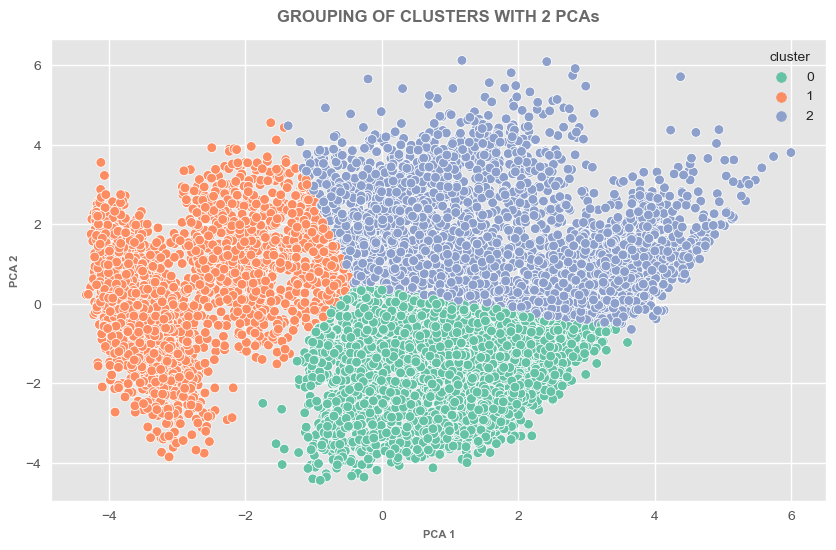

In [377]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca1_kmn, palette = 'Set2')
plt.title('GROUPING OF CLUSTERS WITH 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [402]:
pca2 = PCA(n_components=3, random_state=18)
df_pca2 = pca2.fit_transform(df_norm)
df_pca2


array([[-0.48290922, -3.10060331,  0.04045049],
       [-3.42046338,  0.82715043, -0.31340389],
       [ 1.40237894,  0.9520523 ,  2.37627575],
       ...,
       [ 1.2108367 , -3.2840464 , -1.22314801],
       [-2.95314635, -3.01174885, -0.05380956],
       [-0.30134266,  0.33532563,  1.8379312 ]])

In [404]:
silhouette_coeff1=[]
for k in range(2,11):
    kmeans1=KMeans(n_clusters=k,init="k-means++")
    kmeans1.fit(df_pca2)
    score1=silhouette_score(df_pca2,kmeans.labels_)
    silhouette_coeff1.append(score1)
    
silhouette_coeff1

[0.373931386709185,
 0.373931386709185,
 0.373931386709185,
 0.373931386709185,
 0.373931386709185,
 0.373931386709185,
 0.373931386709185,
 0.373931386709185,
 0.373931386709185]

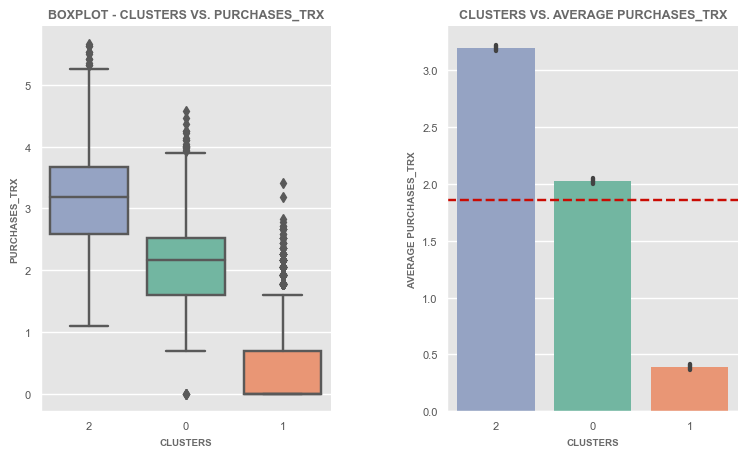

In [418]:
#interpretation of clusters
plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='PURCHASES_TRX', order = df.groupby(['cluster'])['PURCHASES_TRX'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES_TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES_TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb','#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['PURCHASES_TRX'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_TRX', data=df, order = df.groupby(['cluster'])['PURCHASES_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PURCHASES_TRX', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PURCHASES_TRX', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();



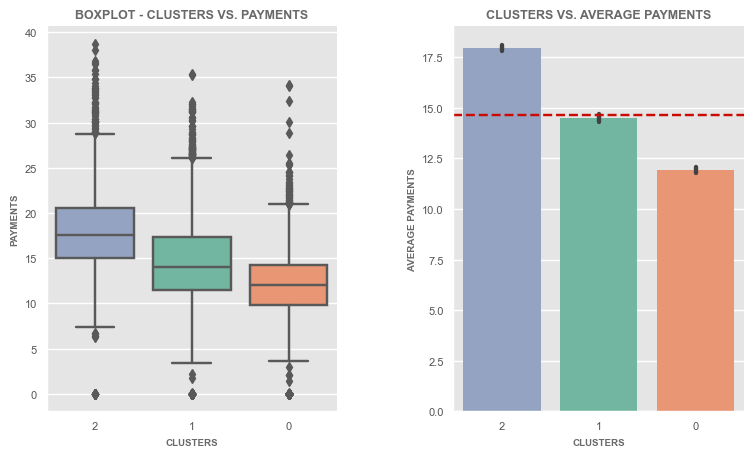

In [417]:
plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='PAYMENTS', order = df.groupby(['cluster'])['PAYMENTS'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb','#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'PAYMENTS', data=df, order = df.groupby(['cluster'])['PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PAYMENTS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PAYMENTS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();


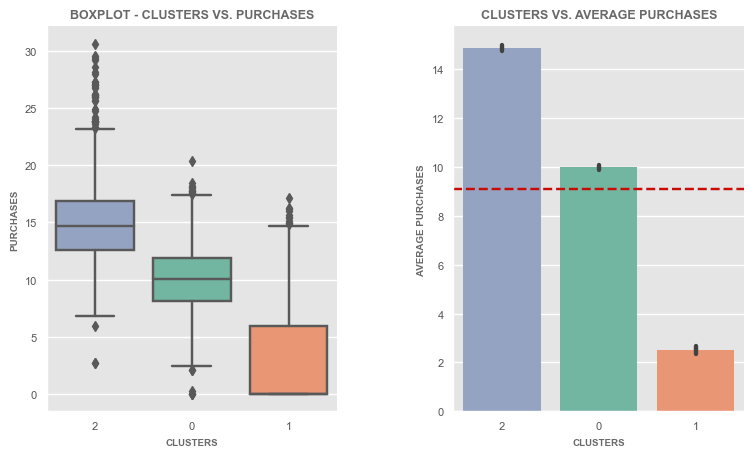

In [415]:
plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='PURCHASES', order = df.groupby(['cluster'])['PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = [ '#8da0cb','#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES', data=df, order = df.groupby(['cluster'])['PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE PURCHASES', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE PURCHASES', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();


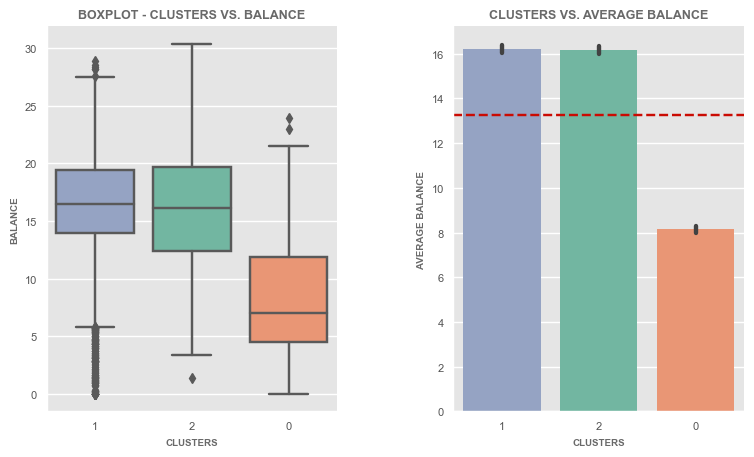

In [416]:
plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='BALANCE', order = df.groupby(['cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS VS. BALANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('BALANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = [ '#8da0cb','#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
mean = np.mean(df['BALANCE'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE', data=df, order = df.groupby(['cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(mean, color='r', linestyle='--')
plt.title('CLUSTERS VS. AVERAGE BALANCE', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('AVERAGE BALANCE', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();


In [394]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

silhouette_coeff1=[]
for k in range(2,11):
    kmedoids=KMedoids(n_clusters=k,init="k-medoids++")
    kmedoids.fit(df_pca1)
    score=silhouette_score(df_pca1,kmedoids.labels_)
    silhouette_coeff1.append(score)
    
silhouette_coeff1

     ------------------------------------ 343.0/343.0 kB 788.6 kB/s eta 0:00:00


[0.45876631538998563,
 0.4501338153060998,
 0.456606045033277,
 0.42680358014366904,
 0.38882297020623074,
 0.3858501173777745,
 0.3673555041247487,
 0.3680574895201085,
 0.3848782029078982]